In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

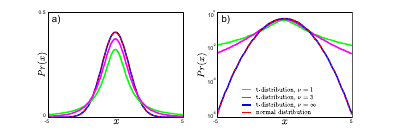

Fig.15 a) As well as the mean µ and scaling parameter σ 2 , the t- distribution has a parameter ν which is termed the degrees of freedom. As ν decreases, the tails of the distribution become longer and the model becomes more robust. b) This is seen more clearly on a log scale.
## The t-Distribution

The second significant problem with using the normal distribution to describe visual data is that it is not robust: the height of the normal probability density function (pdf) falls off very rapidly as we move into the tails. The effect of this is that outliers (unusually extreme observations) drastically affect the estimated parameters (Figure 7.14). The t-distribution is a closely related distribution in which the length of the tails is parameterized.

### Univariate t-Distribution

The univariate t-distribution (Figure 7.15) has the probability density function:

$$
P r(x) = \text{Stud}_x (\mu, \sigma^2, \nu) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu \pi \sigma^2} \Gamma(\frac{\nu}{2})} \left( 1 + \frac{(x - \mu)^2}{\nu \sigma^2} \right)^{-\frac{\nu+1}{2}},
\quad (7.20)
$$

where:
- $ \mu $ is the mean,
- $ \sigma^2 $ is the scale parameter,
- $ \nu \in (0, \infty] $ controls the length of the tails.

When $ \nu $ is small, there is considerable weight in the tails. For example, with $ \mu = 0 $ and $ \sigma^2 = 1 $, a data point at $ x = -5 $ is roughly $ 10^4 = 10000 $ times more likely under the t-distribution with $ \nu = 1 $ than under the normal distribution. As $ \nu \to \infty $, the distribution approximates a normal distribution more closely and there is less weight in the tails.

The variance of the distribution is given by:

$$
\frac{\sigma^2 \nu}{\nu - 2}, \quad \text{for } \nu > 2,
$$

and is infinite if $ 0 < \nu \leq 2 $.

### Multivariate t-Distribution

The multivariate t-distribution has the probability density function:

$$
P r(x) = \text{Stud}_x [\mu, \Sigma, \nu] = \frac{\Gamma(\frac{\nu+D}{2})}{(\nu \pi)^{D/2} |\Sigma|^{1/2} \Gamma(\frac{\nu}{2})} \left( 1 + \frac{(x - \mu)^T \Sigma^{-1} (x - \mu)}{\nu} \right)^{-\frac{\nu+D}{2}},
\quad (7.21)
$$

where:
- $ D $ is the dimensionality of the space,
- $ \mu $ is a $ D \times 1 $ mean vector,
- $ \Sigma $ is a $ D \times D $ positive definite scale matrix,
- $ \nu \in [0, \infty] $ is the degrees of freedom.

As for the multivariate normal distribution, the scale matrix can take full, diagonal, or spherical forms.

The covariance of the distribution is given by:

$$
\frac{\Sigma \nu}{\nu - 2}, \quad \text{for } \nu > 2,
$$

and is infinite if $ 0 \leq \nu \leq 2 $.

### The Gamma Distribution

The gamma distribution is defined on positive real values and has two parameters $ \alpha, \beta $. The mean of the distribution is:

$$
E[h] = \frac{\alpha}{\beta},
$$

and the variance is:

$$
E[(h - E[h])^2] = \frac{\alpha}{\beta^2}.
$$

### Student t-Distribution as a Marginalization

As for the mixtures of Gaussians, it is also possible to understand the t-distribution in terms of hidden variables. We define:

$$
P r(x|h) = \text{Norm}_x [\mu, \Sigma/h],
$$

$$
P r(h) = \text{Gam}_h [\nu/2, \nu/2],
\quad (7.22)
$$

where $ h $ is a scalar hidden variable and $ \text{Gam}[\alpha, \beta] $ is the gamma distribution with parameters $ \alpha, \beta $:

$$
\text{Gam}_h [\alpha, \beta] = \frac{\beta^\alpha}{\Gamma[\alpha]} h^{\alpha - 1} e^{-\beta h},
\quad (7.23)
$$

where $ \Gamma[\cdot] $ is the gamma function.

The t-distribution is the marginalization with respect to the hidden variable $ h $ of the joint distribution between the data $ x $ and $ h $:

$$
P r(x) = \int P r(x, h) dh = \int P r(x|h) P r(h) dh.
$$

Substituting the expressions:

$$
P r(x) = \int \text{Norm}_x [\mu, \Sigma/h] \text{Gam}_h [\nu/2, \nu/2] dh = \text{Stud}_x [\mu, \Sigma, \nu].
\quad (7.24)
$$

This formulation also provides a method to generate data from the t-distribution: we first generate $ h $ from the gamma distribution and then generate $ x $ from the associated normal distribution $ P r(x|h) $. Hence, the hidden variable has a simple interpretation: it tells us which one of the continuous family of underlying normal distributions was responsible for this data point.



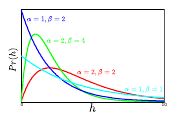

Fig.16 The gamma distribution is deﬁned on positive real values and has two parameters α, β. The mean of the distribution is E[h] = α/β and the variance is E[(h−E[h])2 ] = α/β 2 . The t-distribution can be thought of as a weighted sum of normal distributions with the same mean, but covariances that depend inversely on the gamma distribution.

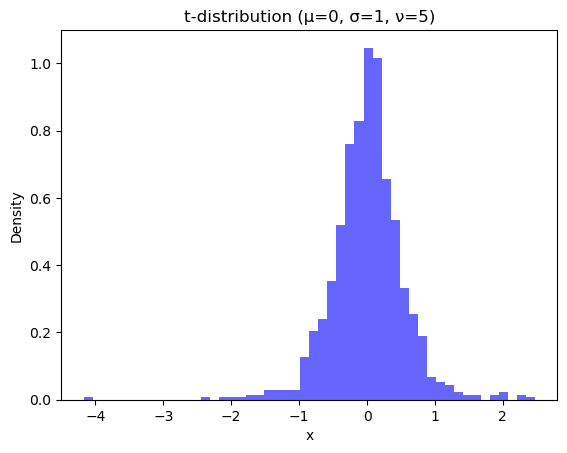

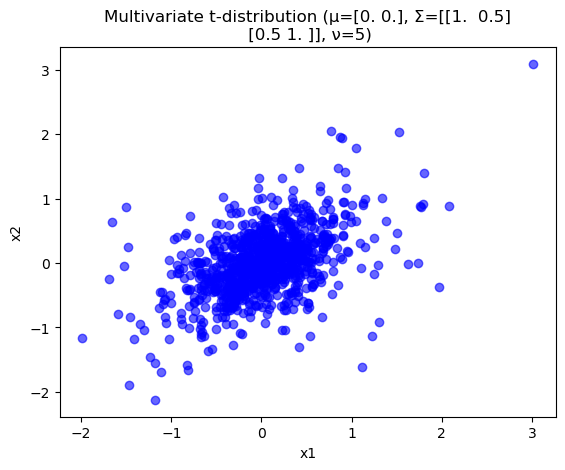

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_t_distribution(mu, sigma, nu, size=1000):
    # Step 1: Generate samples from the Gamma distribution (hidden variable h)
    h = np.random.gamma(nu / 2, nu / 2, size)
    
    # Step 2: Generate samples from the normal distribution conditioned on h
    x = mu + np.random.normal(0, sigma / np.sqrt(h), size)
    
    return x

# Example usage:
mu = 0  # Mean
sigma = 1  # Standard deviation
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

x_samples = generate_t_distribution(mu, sigma, nu, size)

# Plotting the results
plt.hist(x_samples, bins=50, density=True, alpha=0.6, color='b')
plt.title(f"t-distribution (μ={mu}, σ={sigma}, ν={nu})")
plt.xlabel('x')
plt.ylabel('Density')
plt.show()
def generate_multivariate_t_distribution(mu, Sigma, nu, size=1000):
    # Step 1: Generate samples from the Gamma distribution (hidden variable h)
    h = np.random.gamma(nu / 2, nu / 2, size)
    
    # Step 2: Generate samples from the multivariate normal distribution conditioned on h
    d = len(mu)  # Dimensionality
    X = np.zeros((size, d))
    
    for i in range(size):
        # Generate multivariate normal with covariance scaled by h
        X[i] = np.random.multivariate_normal(mu, Sigma / h[i])
    
    return X

# Example usage:
mu = np.zeros(2)  # 2D mean vector
Sigma = np.array([[1, 0.5], [0.5, 1]])  # 2D covariance matrix
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

x_samples_2d = generate_multivariate_t_distribution(mu, Sigma, nu, size)

# Plotting the results
plt.scatter(x_samples_2d[:, 0], x_samples_2d[:, 1], alpha=0.6, color='b')
plt.title(f"Multivariate t-distribution (μ={mu}, Σ={Sigma}, ν={nu})")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [2]:
import random
import math

# Helper function to generate a sample from the Gamma distribution using inverse transform sampling
def gamma_sample(shape, scale):
    # Using the inverse transform method for gamma distribution
    # Generate from a gamma distribution with shape parameter 'shape' and scale 'scale'
    if shape < 1:
        shape += 1
        u = random.random()
        return gamma_sample(shape, scale) * u
    else:
        d = shape - 1.0 / 3.0
        c = 1.0 / math.sqrt(9.0 * d)
        while True:
            x = random.gauss(0, 1)
            v = 1 + c * x
            v = v * v * v
            u = random.random()
            if u < 1 - 0.0331 * (x * x) * (x * x) or math.log(u) < 0.5 * x * x + d * (1 - v + math.log(v)):
                return d * v * scale

# Function to generate samples from a univariate t-distribution
def generate_t_distribution(mu, sigma, nu, size=1000):
    samples = []
    for _ in range(size):
        # Step 1: Generate sample from Gamma distribution (hidden variable h)
        h = gamma_sample(nu / 2, nu / 2)
        
        # Step 2: Generate sample from Normal distribution conditioned on h
        normal_sample = mu + random.gauss(0, sigma / math.sqrt(h))
        samples.append(normal_sample)
    
    return samples

# Example usage
mu = 0  # Mean
sigma = 1  # Standard deviation
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

t_samples = generate_t_distribution(mu, sigma, nu, size)

# Print first few samples to check
print(t_samples[:10])
def generate_multivariate_t_distribution(mu, Sigma, nu, size=1000):
    samples = []
    d = len(mu)  # Dimensionality of the space
    for _ in range(size):
        # Step 1: Generate sample from Gamma distribution (hidden variable h)
        h = gamma_sample(nu / 2, nu / 2)
        
        # Step 2: Generate sample from Multivariate Normal distribution conditioned on h
        # Generating normal samples for each dimension
        normal_sample = [mu[i] + random.gauss(0, math.sqrt(Sigma[i][i] / h)) for i in range(d)]
        samples.append(normal_sample)
    
    return samples

# Example usage
mu = [0, 0]  # 2D mean vector
Sigma = [[1, 0.5], [0.5, 1]]  # 2D covariance matrix
nu = 5  # Degrees of freedom
size = 1000  # Number of samples

multivariate_t_samples = generate_multivariate_t_distribution(mu, Sigma, nu, size)

# Print first few samples to check
print(multivariate_t_samples[:10])


[-0.25249342473777714, -0.34244166832882783, -0.077814343361933, -0.24880243834760613, -0.6352242397512008, 0.5561216413558921, -0.592293627846813, 0.03308295470293417, 0.43214247140234446, -0.378322882612995]
[[-0.6048755323486976, 0.7139223045608719], [-0.04170932550760313, 0.10320292045004642], [0.18303139162322668, -0.12090630903357595], [-0.1612174428127896, 0.2238166340915342], [0.10783091348674084, -0.1582628787354148], [-0.23274049880544728, -0.1698781963609504], [0.0992920329307666, 0.04814150049916111], [1.2311846426646103, -1.1261203184467572], [0.8784508070261896, -0.7009975315555884], [0.4463808928132687, 0.6459328841228618]]
